# --- Day 10: Pipe Maze ---

In [1]:
import itertools

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_input(infile):
    
    with open(infile) as f:
        m = [list(x) for x in f.read().split("\n") if x.strip()]
    m = np.array(m)
  
    # Convert to network
    G = nx.Graph()
    start = None
  
    # Nodes
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):  
            
            if m[i,j] != ".":
                G.add_node((i,j))
            
            if m[i,j] == "S":
                start = (i,j)      
    # Edges
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):  
            if m[i,j] != ".":

                connects = []
               
                if m[i, j] == "|":
                    connects = [(i+1, j), (i-1, j)]
                
                elif m[i, j] == "-":
                    connects = [(i, j+1), (i, j-1)]
                
                elif m[i, j] == "L":
                    connects = [(i-1, j), (i, j+1)]    
                
                elif m[i, j] == "J":
                    connects = [(i-1, j), (i, j-1)]  
                
                elif m[i, j] == "7":
                    connects = [(i+1, j), (i, j-1)]  

                elif m[i, j] == "F":
                    connects = [(i+1, j), (i, j+1)]  

                #print(i,j, m[i, j], connects)
                
                for connect in connects:
                    if connect in G.nodes():
                        G.add_edge((i,j), connect)
    return G, start, m

G, start, m = read_input("input.txt")

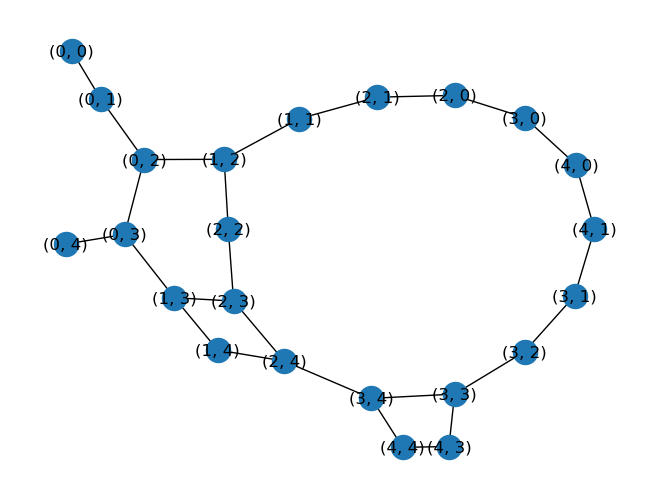

In [5]:
nx.draw(G, with_labels=True)

In [16]:
print(nx.single_source_shortest_path_length(G, start))

{(75, 53): 0, (75, 52): 1, (75, 54): 1, (75, 51): 2, (75, 55): 2, (74, 51): 3, (75, 56): 3, (74, 52): 4, (74, 56): 4, (74, 53): 5, (74, 55): 5, (74, 57): 5, (74, 54): 6, (73, 55): 6, (75, 57): 6, (73, 54): 7, (73, 56): 7, (75, 58): 7, (73, 57): 8, (75, 59): 8, (73, 58): 9, (75, 60): 9, (74, 58): 10, (76, 60): 10, (74, 59): 11, (77, 60): 11, (74, 60): 12, (77, 59): 12, (73, 60): 13, (76, 59): 13, (73, 59): 14, (73, 61): 14, (76, 58): 14, (72, 59): 15, (73, 62): 15, (74, 61): 15, (77, 58): 15, (72, 58): 16, (72, 62): 16, (74, 62): 16, (77, 57): 16, (71, 58): 17, (72, 61): 17, (74, 63): 17, (76, 57): 17, (70, 58): 18, (71, 61): 18, (72, 60): 18, (73, 63): 18, (75, 63): 18, (74, 64): 18, (76, 56): 18, (70, 57): 19, (71, 62): 19, (71, 60): 19, (73, 64): 19, (75, 62): 19, (75, 64): 19, (77, 56): 19, (71, 57): 20, (70, 62): 20, (71, 59): 20, (72, 64): 20, (73, 65): 20, (76, 62): 20, (76, 64): 20, (77, 55): 20, (72, 57): 21, (70, 61): 21, (70, 59): 21, (71, 64): 21, (73, 66): 21, (74, 65): 21,

In [14]:
for c in nx.find_cycle(G, start) :
    print(c)
    pass

((66, 57), (66, 58))
((66, 58), (67, 58))
((67, 58), (67, 57))
((67, 57), (66, 57))


In [ ]:
# Get the biggest one
loops = sorted([c for c in nx.simple_cycles(G) if start in c], key=len, reverse=True)


In [ ]:
print(start)

In [29]:
G2 = G.copy()
for node in list(G2.nodes()):
    if node not in loops[0]:
        G2.remove_node(node)

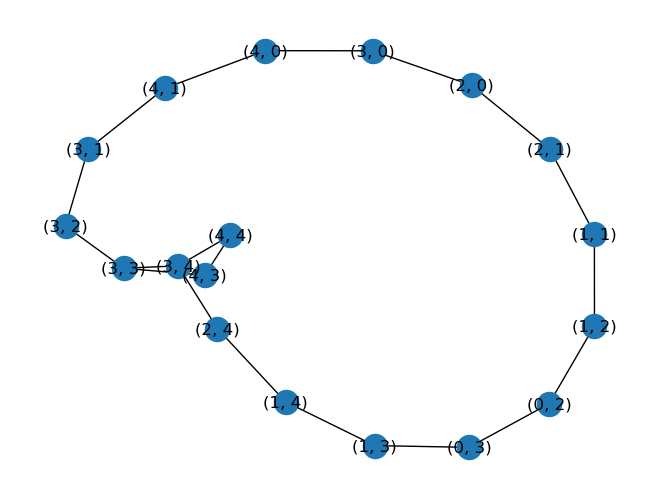

In [30]:
nx.draw(G2, with_labels=True)

In [33]:
d = np.full(m.shape, ".")

for k,v in nx.single_source_shortest_path_length(G2, start).items():
    d[k] = v
d

array([['.', '.', '4', '5', '.'],
       ['.', '2', '3', '6', '7'],
       ['0', '1', '.', '.', '8'],
       ['1', '4', '5', '6', '7'],
       ['2', '3', '.', '7', '8']], dtype='<U1')